# Linear Transformations - Lab done by `Eugene Maina`

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [5]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


We'll also drop any records with missing values for any of these features:

In [6]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


And plot the distributions of the un-transformed variables:

AttributeError: 'Axes' object has no attribute 'is_first_col'

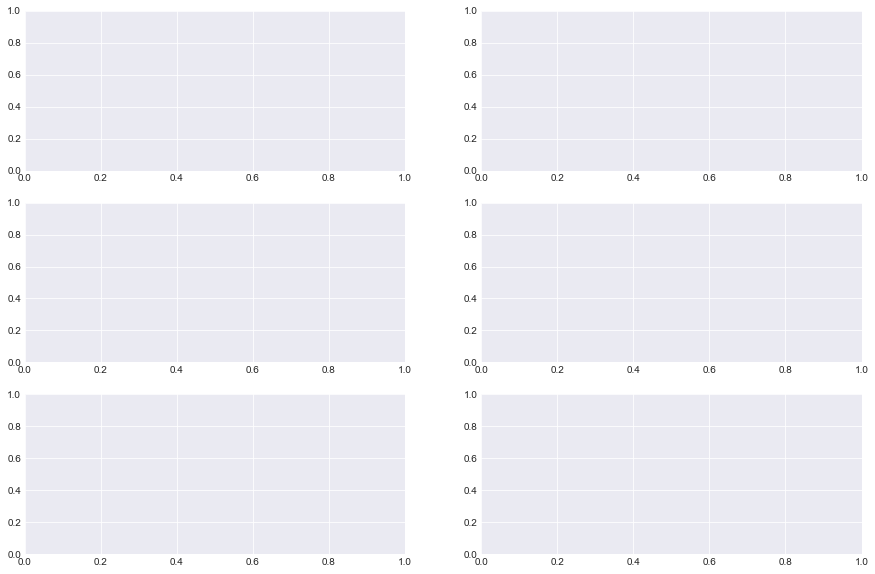

In [7]:
ames.hist(figsize=(15,10), bins='auto');

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [8]:
# Your code here - build a linear regression model with un-transformed features
import statsmodels.api as sm

y= ames['SalePrice']
X = ames[[
        "LotArea",
        "MasVnrArea",
        "TotalBsmtSF",
        "GrLivArea",
        "GarageArea"
        ]]

baseline_model = sm.OLS(y, sm.add_constant(X)).fit()
print(baseline_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:41:55   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.525e+04   4145.934     -3.677      

## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [9]:
# Your written answer here
print(f'The R-squares Adjusted indicates that 67.5% of the variance in the Sale Price can be described by the model.\nThe p value of the predictors all fall below the alpha of 0.05 meaning they all have statistical significance.\nThe Lot area however falls very near the alpha hence it has little significance on the sale price.\nThe coeficients indicated mean:\n *For every 1 square foot increase in lot area, there is a 0.2568 increase in sale price.\n *For every 1 square foot increase in Masonry veneer area, there is a 55.0481 increase in price.\n *For every 1 square foot increase in Above ground living area, there is a 63.8443 increse in sale price.\n *For every 1 square foot increase in Basement area,there is a 44.1640 increase in the price.\n *For every 1 square foot increase in Garage area,there is a 93.4629 increase in the price.')

The R-squares Adjusted indicates that 67.5% of the variance in the Sale Price can be described by the model.
The p value of the predictors all fall below the alpha of 0.05 meaning they all have statistical significance.
The Lot area however falls very near the alpha hence it has little significance on the sale price.
The coeficients indicated mean:
 *For every 1 square foot increase in lot area, there is a 0.2568 increase in sale price.
 *For every 1 square foot increase in Masonry veneer area, there is a 55.0481 increase in price.
 *For every 1 square foot increase in Above ground living area, there is a 63.8443 increse in sale price.
 *For every 1 square foot increase in Basement area,there is a 44.1640 increase in the price.
 *For every 1 square foot increase in Garage area,there is a 93.4629 increase in the price.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [16]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters
transformed_predictors = ames[["LotArea", "MasVnrArea","TotalBsmtSF","GrLivArea","GarageArea"]]*0.092903
transformed_model = sm.OLS(y,sm.add_constant(transformed_predictors)).fit()
print(transformed_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:50:46   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.525e+04   4145.934     -3.677      

In [17]:
# Your written answer here
print(f'*For every 1 square meter increase in lot area, there is a 2.764 increase in sale price.\n*For every 1 square meter increase in Masonry veneer area, there is a 592.533 increase in price.\n*For every 1 square meter increase in Above ground living area, there is a 687.215 increse in sale price.\n*For every 1 square meter increase in Basement area,there is a 475.378 increase in the price.\n*For every 1 square meter increase in Garage area,there is a 1006.027 increase in the price.')

*For every 1 square meter increase in lot area, there is a 2.764 increase in sale price.
*For every 1 square meter increase in Masonry veneer area, there is a 592.533 increase in price.
*For every 1 square meter increase in Above ground living area, there is a 687.215 increse in sale price.
*For every 1 square meter increase in Basement area,there is a 475.378 increase in the price.
*For every 1 square meter increase in Garage area,there is a 1006.027 increase in the price.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [20]:
# Your code here - center data
X_centered = transformed_predictors.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()



In [22]:
# Your code here - build a new model
centered_model = sm.OLS(y,sm.add_constant(X_centered)).fit().summary()

print(centered_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:55:35   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.806e+05   1186.695    152.200      

In [25]:
# Your written answer here - interpret the new intercept
print(f'The minimum price point of a house with an average size of all of the given predictors is $180,600')

The minimum price point of a house with an average size of all of the given predictors is $180,600


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [30]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scale.fit(X)

scaled_X = scale.transform(X)

scaled_model = sm.OLS(y,sm.add_constant(scaled_X)).fit()

print(scaled_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:05:18   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.806e+05   1186.695    152.200      0.0

In [32]:
# Your written answer here - identify the "most important" feature
print(f'After standardization, the model shows that the Above grade living area is the most important predictor with a coefficent of 3.355e+04 ')

After standardization, the model shows that the Above grade living area is the most important predictor with a coefficent of 3.355e+04 


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!